<a href="https://colab.research.google.com/github/Pawan-Kumar-Sahu/ML-Library-1/blob/master/neural_1_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline

In [3]:
d= pd.read_csv('mnist_train_small.csv',header=None)
data=np.array(d)
print (data)
Y = data[:,0]
print (Y)
X = data[:,1:]
print (X)

[[6 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]
 [7 0 0 ... 0 0 0]
 ...
 [2 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]]
[6 5 7 ... 2 9 5]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


no. of units5
2.109695943635338


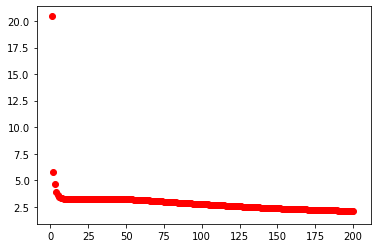

In [67]:
class neural_short():
  
  def sigmoid(self,c):
    return 1/(1+np.exp(-c))
  
  def for_prop(self):
    self.a_2d=[]
    a_0=list(self.x)
    a_0.append(1)
    a_0=np.array(a_0)
    self.a_2d.append(a_0)
    z_1=self.theta[0].dot(a_0)
    a_1=list(self.sigmoid(z_1))
    a_1.append(1)
    a_1=np.array(a_1)
    self.a_2d.append(a_1)
    z_2=self.theta[1].dot(a_1)
    a_2=self.sigmoid(z_2)
    a_2=np.array(a_2)
    self.a_2d.append(a_2)
    self.a_2d=np.array(self.a_2d)
  
  def initialize(self):
    self.theta=[]
    self.units=int(input("no. of units"))
    t_0=np.zeros([self.units,self.n+1])
    self.theta.append(t_0)
    t_1=np.zeros([len(np.unique(self.y_all)),self.units+1])
    self.theta.append(t_1)
    self.theta=np.array(self.theta)
    for i in range(len(self.theta)):
      for j in range(len(self.theta[i])):
        for k in range(len(self.theta[i][j])):
            self.theta[i][j][k]=random.random()
  
  def backprop(self):
    self.sigma=[]
    s_1=self.a_2d[-1]-self.y
    s_0=(self.theta[-1].T.dot(s_1))*self.a_2d[1]*(1-self.a_2d[1])
    self.sigma.append(s_0)
    self.sigma.append(s_1)
    self.sigma=np.array(self.sigma)
    #print(s_0.shape,s_1.shape,self.sigma.shape)

  def y_det(self,yy):
    for index,i in enumerate(np.unique(self.y_all)):
      if yy==i:
        yy=np.zeros(len(np.unique(self.y_all)))
        yy[index]=1
        return yy

  def train(self,x,y,itr=500,lr=0.001):
    self.x_all=x
    self.y_all=y
    self.m=self.x_all.shape[0]
    self.n=self.x_all.shape[1]
    self.itr=itr
    self.lr=lr
    self.initialize()
    k=0
    while k<self.itr:
      delta=self.theta-self.theta
      j=[]
      for eg in range(self.m):
        self.x=self.x_all[eg]
        self.x=(self.x-np.mean(self.x))/(np.max(self.x)-np.min(self.x))
        self.y=self.y_det(self.y_all[eg])
        self.for_prop()
        j.append(np.sum((self.y*np.log(self.a_2d[-1])) + ((1-self.y)*np.log(1-self.a_2d[-1]))))
        self.backprop()
        delta[0]=delta[0]+ (np.array([self.a_2d[0]])*np.array([self.sigma[0][:-1]]).T)
        delta[1]=delta[1]+ (np.array([self.a_2d[1]])*np.array([self.sigma[1]]).T)
        #print(self.y,self.a_2d[-1])
      cj=-(np.sum(np.array(j)))/self.m
      #print(cj)
      delta=delta/self.m
      self.theta=self.theta - (self.lr*delta)
      plt.scatter(k+1,cj,color='red')
      k=k+1
    print("loss value is --",cj)
    plt.show()

  def test(self,xt,yt):
    self.yt=yt
    print(self.yt)
    self.pred=[]
    for i in range(xt.shape[0]):
      self.x=xt[i]
      self.x=(self.x-np.mean(self.x))/(np.max(self.x)-np.min(self.x))
      self.for_prop()
      self.pred.append(np.unique(self.y_all)[np.argmax(self.a_2d[-1])])
    self.pred=np.array(self.pred)
    return self.pred
  
  def accuracy(self):
    accu=self.yt-self.pred
    print((np.count_nonzero(accu==0)/len(self.yt))*100)


obj=neural_short()
obj.train(X[:500,:],Y[:500],200,1)

In [71]:
print(obj.test(X,Y))
obj.accuracy()

[6 5 7 ... 2 9 5]
[4 2 0 ... 2 7 1]
44.015


In [69]:
d_n= pd.read_csv('sample_data/mnist_test.csv',header=None)
data_n=np.array(d_n)
Y_n = data_n[:,0]
print (Y_n)
X_n = data_n[:,1:]

print(obj.test(X_n,Y_n))
obj.accuracy()

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]
[7 2 2 ... 4 6 6]
43.75
